#Capstone Project Module 3

Nama : Muhammad Faizal Akbar

Dataset : Bike Sharing

##Sumber data

-Contents
-Business Problem Understanding
-Data Understanding
-Data Preprocessing (Data Cleaning, Feature Selection, Feature Engineering) -Modeling (Algorithm, Evaluation Metrics)
-Conclusion
-Recommendation / Improvement

##Business Problem Understanding

Bike sharing merupakan sebuah sistem penyewaan sepeda dimana seseorang dapat menyewa sepeda pada satu lokasi (dock), dan mengembalikannya pada dock lain di lokasi yang berbeda namun masih dalam satu sistem yang sama. Perusahaan juga menyediakan fitur membership (keanggotaan), namun seseorang tetap dapat menyewa sepeda meskipun tidak terdaftar sebagai anggota.

Data yang digunakan dalam project ini adalah data cuaca yaitu humidity dan temperatur, musim, tanggal, jam, keanggotaan, serta total penyewa pada satu hari tertentu.

##Problem Statement

Dari dataset tersebut, dapat dilihat bahwa terdapat tantangan bagi perusahaan penyedia layanan Bike sharing yaitu berapa banyak unit sepeda yang perlu disiapkan pada waktu tertentu. Untuk itu diperlukan terlebih dahulu pemahaman terhadap customer penyewa sepeda pada kondisi dan waktu tertentu, sehingga perusahaan dapat menyediakan jumlah sepeda yang optimal. Karena jika jumlah sepeda tidak mencukupi demand dari customer, maka perusahaan berpotensi kehilangan kepercayaan customer yang berujung pada hilangnya pelanggan. Namun, jika penyediaan sepeda melampaui demand yang ada, maka tidak baik untuk perusahaan dalam hal effisiensi.

##Goals

Berdasarkan kondisi tersebut, perusahaan ingin menentukan jumlah unit sepeda yang optimal untuk disediakan pada waktu dan kondisi tertentu, sehingga perlu adanya analisis terkait jumlah penyewa pada waktu dan kondisi tertentu.

##Analytic Approach

Analisis diperlukan terhadap data untuk melihat pola dari kondisi-kondisi yang terjadi dapat mempengaruhi penyewaan sepeda untuk kemudian dibuat model regresi untuk prediksi total jumlah sepeda yang perlu disediakan perusahaan pada waktu dan kondisi tertentu.

##Metric Evaluation

Evaluasi metrik yang akan digunakan adalah MAE, MAPE, dan RMSE. Semakin mendekati nol nilai MAE, MAPE, dan RMSE yang dihasilkan, berarti model semakin akurat dalam memprediksi total penyewa sesuai dengan limitasi fitur yang digunakan.

MAE adalah metrik sederhana yang menghitung selisih absolut antara hasil aktual dan hasil prediksi, cocok digunakan jika Y memiliki variance yang kecil, dan terdapat banyak outliers pada residual.

MAPE adalah rataan persentase error yang dihasilkan oleh model regresi, cocok digunakan jika ingin mengukur performa model berdasarkan error relative dan dapat digunakan untuk data dengan banyak outliers.

RMSE adalah akar dari selisih kuadrat hasil prediksi dan hasil aktual, cocok digunakan jika variance dan rentang nilai target tidak terlalu besar dan memiliki sedikit outliers.

##Data Understanding

Dataset yang akan digunakan merupakan data rental sepeda pada tahun 2011 - 2012. Setiap baris data merepresentasikan informasi terkait penyewaan sepeda pada jam dan tanggal tertentu.

**Attributes Information**

| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| dteday | Object | Date |
| hum | Float | Normalized humidity. The values are divided to 100 (max) |
| weathersit | Integer | Weather Situation. Details : |
|  |  | 1: Clear, Few clouds, Partly cloudy |
|  |  | 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist |
|  |  | 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds |
|  |  | 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog |
| holiday | Integer | Whether the day is considered a holiday |
| season | Integer | 1 = spring, 2 = summer, 3 = fall, 4 = winter |
| atemp | Float | "Feels like" temperature in Celsius |
| temp | Float | Temperature in Celsius |
| hr | Integer | Hour (0 to 23) |
| casual | Integer | Number of non-registered user rentals initiated |
| resgistered | Integer | Number of registered user rentals initiated |
| cnt | Integer | Number of total rentals (include both casual and registered) |



<br>

#LIBRARY

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
pip install matplotlib --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


###DATASET

In [ ]:
df = pd.read_csv('data_bike_sharing.csv')
df.head()

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
0,2011-12-09,0.62,1,0,4,0.3485,0.36,16,24,226,250
1,2012-06-17,0.64,1,0,2,0.5152,0.54,4,2,16,18
2,2011-06-15,0.53,1,0,2,0.6212,0.62,23,17,90,107
3,2012-03-31,0.87,2,0,2,0.3485,0.36,8,19,126,145
4,2012-07-31,0.55,1,0,3,0.6970,0.76,18,99,758,857


##DATA PREPROCESSING

Pada tahap data preprocessing, akan dilakukan cleaning data. Dataset yang sudah bersih akan digunakan untuk proses analisis lebih lanjut. Pada tahap ini, akan dilakukan :

- Menghapus data duplicate.
Jika terdapat kesalahan tipe data, akan diubah ke tipe yang seharusnya.

- Drop fitur yang tidak memiliki relevansi terhadap masalah yang sedang dihadapi.

- Add fitur yang kemungkinan memiliki relevansi terhadap masalah yang sedang dihadapi.

- Jika terdapat missing value, perlu dilakukan treatment yang sesuai (Drop fitur, imputasi dengan nilai yang sesuai, drop data, etc).

- Jika terdapat outlier, perlu dilakukan treatment yang sesuai.
Untuk proses data preprocessing dan feature engineering, akan digunakan dataframe duplikasi dari dataframe yang sebelumnya digunakan.

###ADD FEATURE ENGINEERING

In [ ]:
# Menambahkan month, year, dayname dari fitur dteday
month=[]
year=[]
dayname=[]
df['month'] = pd.to_datetime(df['dteday']).dt.month
df['year'] = pd.to_datetime(df['dteday']).dt.year
df['dayname'] = pd.to_datetime(df['dteday']).dt.day_of_week

In [ ]:
df

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt,month,year,dayname
0,2011-12-09,0.62,1,0,4,0.3485,0.36,16,24,226,250,12,2011,4
1,2012-06-17,0.64,1,0,2,0.5152,0.54,4,2,16,18,6,2012,6
2,2011-06-15,0.53,1,0,2,0.6212,0.62,23,17,90,107,6,2011,2
3,2012-03-31,0.87,2,0,2,0.3485,0.36,8,19,126,145,3,2012,5
4,2012-07-31,0.55,1,0,3,0.6970,0.76,18,99,758,857,7,2012,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12160,2012-01-25,0.75,1,0,1,0.2273,0.24,7,14,243,257,1,2012,2
12161,2012-07-06,0.62,1,0,3,0.7424,0.78,0,39,63,102,7,2012,4
12162,2012-02-20,0.60,2,1,1,0.2121,0.24,5,0,6,6,2,2012,0
12163,2012-03-31,0.77,2,0,2,0.4242,0.42,2,14,55,69,3,2012,5


###HANDLE DUPLICATE DATA

In [ ]:
# Cek data duplikat
df.duplicated().sum()

0

###HANDLE MISSING VALUE

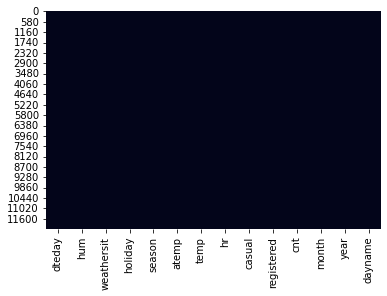

In [ ]:
# Missing value heatmap
sns.heatmap(df.isnull(), cbar=False);

In [ ]:
na=df.isna().sum()
na

dteday        0
hum           0
weathersit    0
holiday       0
season        0
atemp         0
temp          0
hr            0
casual        0
registered    0
cnt           0
month         0
year          0
dayname       0
dtype: int64

#####tidak ada missing value pada dataset bike sharing

###Melakukan penyesuaian data

In [ ]:
rep={1:"winter",2:"spring",3:"summer",4:"Autumn"}
df['season']=df['season'].replace(rep)
df.season.unique()

array(['Autumn', 'spring', 'summer', 'winter'], dtype=object)

In [ ]:
rep={1:"clear",2:"mist",3:"light rain",4:"heavy rain"}
df['weathersit']=df['weathersit'].replace(rep)
df.weathersit.unique()

array(['clear', 'mist', 'light rain', 'heavy rain'], dtype=object)

In [ ]:
rep={1:"tue",2:"wed",3:"thu",4:"fri",5:"sat",6:"sun",0:"mon"}
df['dayname']=df['dayname'].replace(rep)
df.dayname.unique()

array(['fri', 'sun', 'wed', 'sat', 'tue', 'mon', 'thu'], dtype=object)

###CEK OUTLIERS

In [ ]:
def outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    batas = IQR*1.5
    print(f'IQR: {IQR}')

    batas_bawah = Q1 - batas
    batas_atas = Q3 + batas
    print(f'batas_bawah: {batas_bawah}')
    print(f'batas_atas: {batas_atas}')  

In [ ]:
#HUMIDITY
outliers(df['hum'])

IQR: 0.31000000000000005
batas_bawah: 0.004999999999999893
batas_atas: 1.245


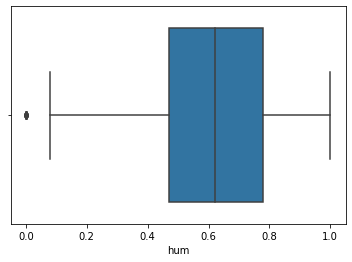

In [ ]:
sns.boxplot(df['hum'])
plt.show()

In [ ]:
df[(df['hum'] > 1.245) | (df['hum'] < 0.004999999999999893)].count()['hum']

14

In [ ]:
#atemp
outliers(df['atemp'])

IQR: 0.2879
batas_bawah: -0.09854999999999997
batas_atas: 1.0530499999999998


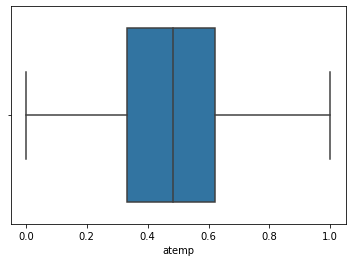

In [ ]:
sns.boxplot(df['atemp'])
plt.show()

In [ ]:
df[(df['atemp'] > 1.0530499999999998) | (df['atemp'] < -0.09854999999999997)].count()['atemp']

0

In [ ]:
#temp
outliers(df['temp'])

IQR: 0.32
batas_bawah: -0.13999999999999996
batas_atas: 1.1400000000000001


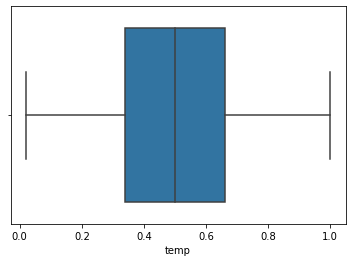

In [ ]:
sns.boxplot(df['temp'])
plt.show()

In [ ]:
df[(df['temp'] > 1.1400000000000001) | (df['temp'] < -0.13999999999999996)].count()['temp']

0

In [ ]:
#cnt
outliers(df['cnt'])

IQR: 242.0
batas_bawah: -323.0
batas_atas: 645.0


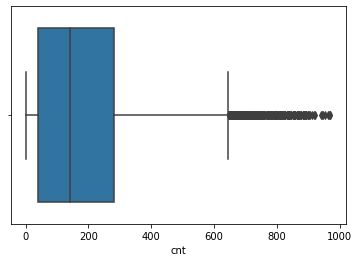

In [ ]:
sns.boxplot(df['cnt'])
plt.show()

In [ ]:
df[(df['cnt'] > 645) | (df['cnt'] < -323.0)].count()['cnt']

338

In [ ]:
# # Melakukan filtering pada data
df = df[(df['cnt'] <= 645.0) & (df['cnt'] >= -323.0)]
df = df[(df['hum'] <= 1.245) & (df['hum'] >= 0.004999999999999893)]
df

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt,month,year,dayname
0,2011-12-09,0.62,clear,0,Autumn,0.3485,0.36,16,24,226,250,12,2011,fri
1,2012-06-17,0.64,clear,0,spring,0.5152,0.54,4,2,16,18,6,2012,sun
2,2011-06-15,0.53,clear,0,spring,0.6212,0.62,23,17,90,107,6,2011,wed
3,2012-03-31,0.87,mist,0,spring,0.3485,0.36,8,19,126,145,3,2012,sat
5,2012-10-01,0.72,clear,0,Autumn,0.4545,0.46,0,6,39,45,10,2012,mon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12160,2012-01-25,0.75,clear,0,winter,0.2273,0.24,7,14,243,257,1,2012,wed
12161,2012-07-06,0.62,clear,0,summer,0.7424,0.78,0,39,63,102,7,2012,fri
12162,2012-02-20,0.60,mist,1,winter,0.2121,0.24,5,0,6,6,2,2012,mon
12163,2012-03-31,0.77,mist,0,spring,0.4242,0.42,2,14,55,69,3,2012,sat


###DROP FEATURE SELECTION

In [ ]:
df = df.drop(columns=['dteday','casual','registered'])
df

,hum,weathersit,holiday,season,atemp,temp,hr,cnt,month,year,dayname
0,0.62,clear,0,Autumn,0.3485,0.36,16,250,12,2011,fri
1,0.64,clear,0,spring,0.5152,0.54,4,18,6,2012,sun
2,0.53,clear,0,spring,0.6212,0.62,23,107,6,2011,wed
3,0.87,mist,0,spring,0.3485,0.36,8,145,3,2012,sat
5,0.72,clear,0,Autumn,0.4545,0.46,0,45,10,2012,mon
...,...,...,...,...,...,...,...,...,...,...,...
12160,0.75,clear,0,winter,0.2273,0.24,7,257,1,2012,wed
12161,0.62,clear,0,summer,0.7424,0.78,0,102,7,2012,fri
12162,0.60,mist,1,winter,0.2121,0.24,5,6,2,2012,mon
12163,0.77,mist,0,spring,0.4242,0.42,2,69,3,2012,sat


###EDA

In [ ]:
df_hol = df['holiday'].value_counts()
df_sea = df['season'].value_counts()
df_wea = df['weathersit'].value_counts()
df_hr = df['hr'].value_counts()

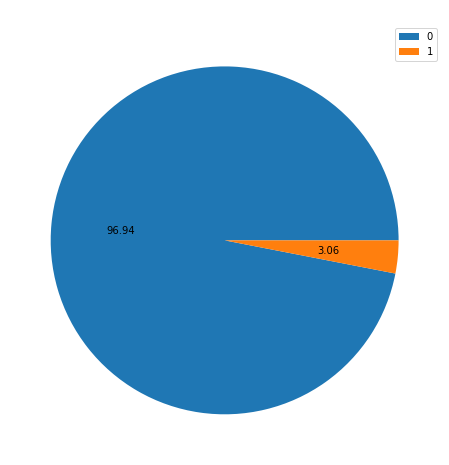

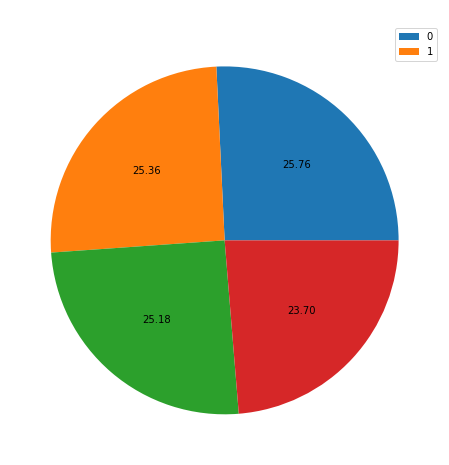

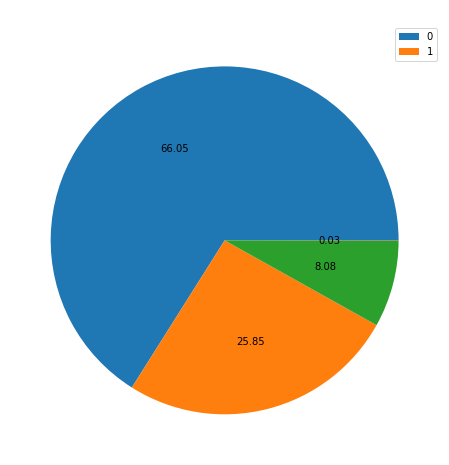

In [ ]:
plt.figure(figsize = (10,8))
plt.pie(x = df_hol, autopct = '%.2f')
plt.title('Customer Diagram by Holiday', color = 'white' )
plt.legend(df_hol.index)

plt.figure(figsize = (10,8))
plt.pie(x = df_sea, autopct = '%.2f')
plt.title('Customer Diagram by Season', color = 'white' )
plt.legend(df_hol.index)

plt.figure(figsize = (10,8))
plt.pie(x = df_wea, autopct = '%.2f')
plt.title('Customer Diagram by Weather Condition', color = 'white' )
plt.legend(df_hol.index)


plt.show()

[Text(0.5, 1.0, 'Checking for outliners in day hours')]

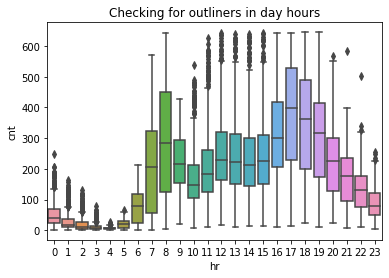

In [ ]:
fig,ax = plt.subplots()
sns.boxplot(data=df[['cnt',
                          'hr']],x='hr',y='cnt',ax=ax)
ax.set(title="Checking for outliners in day hours")

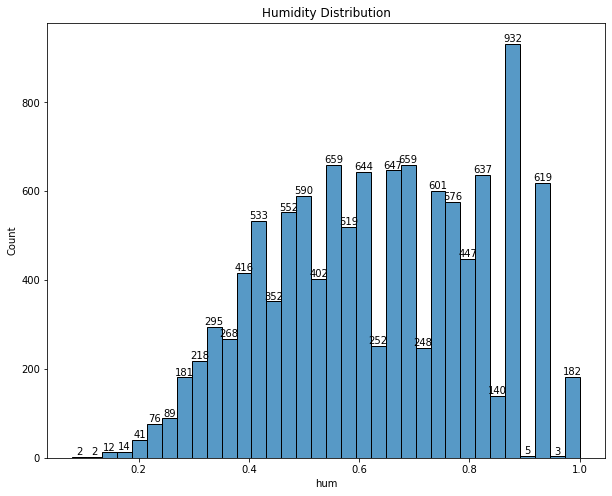

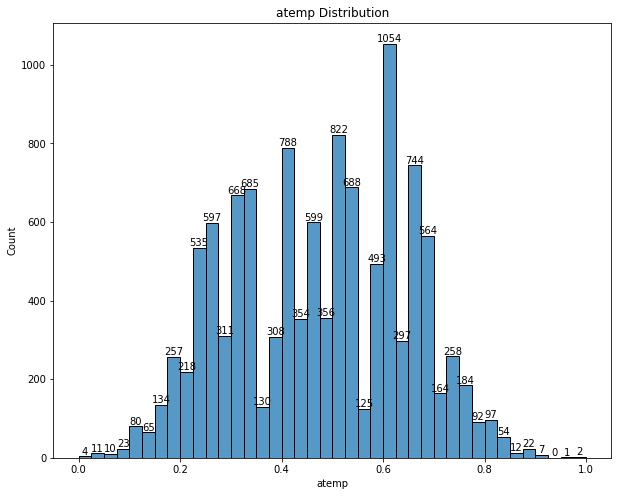

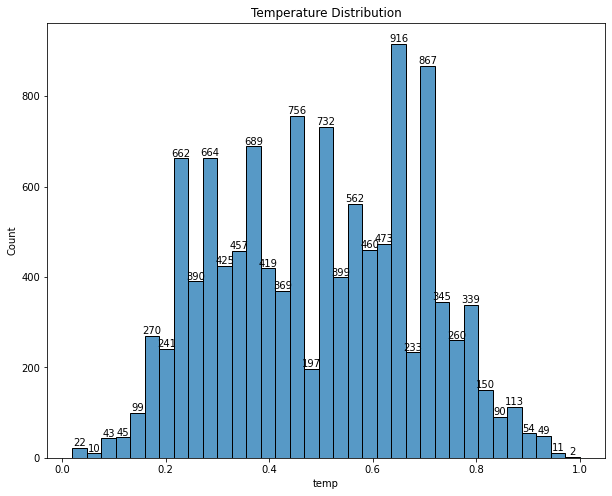

In [ ]:
#INCOME PER CATEGORY
plt.figure(figsize = (10, 8))
ax=sns.histplot(df['hum'])
ax.bar_label(ax.containers[0])
plt.title('Humidity Distribution')

plt.figure(figsize = (10, 8))
ax=sns.histplot(df['atemp'])
ax.bar_label(ax.containers[0])
plt.title('atemp Distribution')

plt.figure(figsize = (10, 8))
ax=sns.histplot(df['temp'])
ax.bar_label(ax.containers[0])
plt.title('Temperature Distribution')

plt.show()

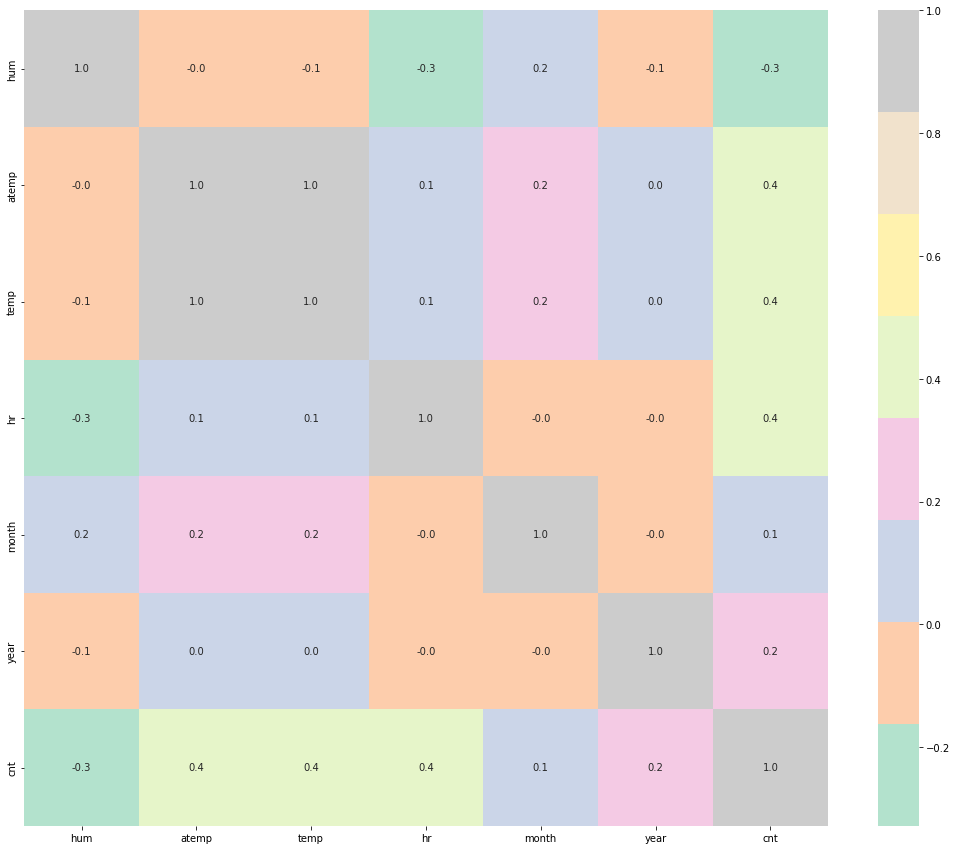

In [ ]:
num = df[['hum', 'atemp', 'temp', 'hr', 'month', 'dayname', 'year', 'cnt']]
num


corr_matrix = num.corr()
plt.figure(figsize=(18, 15))
sns.heatmap(corr_matrix, annot=True,fmt = ".1f", cmap='Pastel2')
plt.show()

In [ ]:
# Cek kembali info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11813 entries, 0 to 12164
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   hum         11813 non-null  float64
 1   weathersit  11813 non-null  object 
 2   holiday     11813 non-null  int64  
 3   season      11813 non-null  object 
 4   atemp       11813 non-null  float64
 5   temp        11813 non-null  float64
 6   hr          11813 non-null  int64  
 7   cnt         11813 non-null  int64  
 8   month       11813 non-null  int64  
 9   year        11813 non-null  int64  
 10  dayname     11813 non-null  object 
dtypes: float64(3), int64(5), object(3)
memory usage: 1.3+ MB


In [ ]:
pip install --upgrade category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##MODELING

In [ ]:
# Import library untuk modeling

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [ ]:
# Mengubah fitur kategorikal menjadi numerikal

transformer = ColumnTransformer([
    ('One Hot', OneHotEncoder(drop='first', handle_unknown = 'ignore'), ['season', 'weathersit', 'holiday']),
    ('Binary', ce.BinaryEncoder(), ['dayname'])
], remainder='passthrough')

In [ ]:
# Memisahkan data independen variabel dengan target
X = df.drop(['cnt'], axis=1)
y = df['cnt']

In [ ]:
# Splitting data training dan test dengan proporsi 70:30
X_train, X_test, y_train, y_test= train_test_split(
    X,
    y,  
    test_size=0.3,
    random_state=2009)

In [ ]:
# Define algoritma yang digunakan
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=1)
rf = RandomForestRegressor(random_state=1)
xgb = XGBRegressor(random_state=1)

# Pemodelan dilakukan dalam skala logaritmik, namun kemudian di-inverse kembali untuk interpretasi
log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)

# Scaling data
scaler = StandardScaler()

# Kandidat algoritma
models = [log_lr, log_knn, log_dt, log_rf, log_xgb]

score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

# Mencari algoritma terbaik berdasarkan nilai MAE
for i in models:
    
    crossval = KFold(n_splits=5, shuffle=True, random_state=1)

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', i)
    ])

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
        )

    print(model_cv_rmse, i)

    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
        )

    print(model_cv_mae, i)

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
        )

    print(model_cv_mape, i)

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())

[-140.19813907 -142.51819281 -138.84025496 -144.8141775  -153.7557464 ] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[ -94.84742449  -96.89700402  -95.57666828  -96.97224882 -105.25473929] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-1.41331164 -1.2513904  -1.42918333 -1.42884009 -1.41320434] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-103.87735701 -107.56623102 -102.14030231 -113.50905833 -118.39014485] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegressor())
[-67.36310407 -69.85084062 -68.32929995 -71.45209319 -75.58141802] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRe

In [ ]:
# Evaluasi hasil dari 5 kandidat algoritma yang digunakan
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor'],
    'Mean_MAE': nilai_mean_mae,
    'Std_MAE': nilai_std_mae,
    'Mean_MAPE': nilai_mean_mape,
    'Std_MAPE': nilai_std_mape,
    'Mean_RMSE': nilai_mean_rmse,
    'Std_RMSE': nilai_std_rmse
})

,Model,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE,Mean_RMSE,Std_RMSE
0,Linear Regression,-97.909617,3.759642,-1.387186,0.068262,-144.025302,5.274602
1,KNN Regressor,-70.515351,2.887891,-1.205162,0.114738,-109.096619,6.063207
2,DecisionTree Regressor,-47.265957,6.305779,-0.538063,0.101157,-80.601328,10.091156
3,RandomForest Regressor,-36.626043,4.763992,-0.377989,0.058930,-59.461053,7.304334
4,XGBoost Regressor,-51.031727,3.343605,-0.502005,0.035898,-79.142465,4.926381


In [ ]:
# Benchmark model terbaik
models = {
    'XGB': XGBRegressor(random_state=2009),
}

score_mae = []
score_mape = []
score_rmse = []

# Prediksi pada test set
for i in models:

    model = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', models[i])
        ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))

score_before_tuning = pd.DataFrame({'MAE': score_mae, 'MAPE': score_mape, 'RMSE': score_rmse}, index=models.keys())
score_before_tuning

[16:03:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,MAE,MAPE,RMSE
XGB,48.312938,0.971036,69.268168


In [ ]:
# Kedalaman pohon. Semakin dalam kemungkinan meningkatkan performance, namun juga kompleksitas dan kemungkinan overfit.
# value integer > 0. Defaultnya 6.
max_depth = list(np.arange(5, 16)) # 5 - 15

# Learning rate. Menentukan ukuran step pada tiap iterasi sementara model mengoptimalkan ke arah tujuannya.
# Learning rate rendah membuat komputasi lebih lambat, dan perlu lebih banyak putaran untuk mencapai pengurangan di
# residual error yang sama seperti model dengan learning rate tinggi. Namun akan mengoptimalkan peluang untuk mencapai best optimum.
# Nilainya 0 - 1. Defaultnya 0,3.
learning_rate = list(np.arange(1, 10)/10) # 0.1 - 0.9

# Jumlah pohon di ensemble. Ekuivalen dengan total round dari boosting.
# value integer > 0. Defaultnya 100.
n_estimators = list(np.arange(100, 300)) # 100 - 299

# Jumlah feature yang digunakan untuk tiap pohon (% dari total kolom train set). Mewakili kolom yang akan diambil samplenya
# secara acak untuk tiap tree. Kemungkinan dapat meningkatkan overfitting.
# value antara 0 - 1. Defaultnya 1.
colsample_bytree = list(np.arange(1, 10)/10) # 0.1 - 0.9

# Jumlah baris tiap pohon (% dari total baris train set). Mewakili feaction observations yang akan dijadikan sample per tree.
# Nilai lebih rendah dapat mencegah overfitting tapi bisa menyebabkan underfitting.
# value antara 0 - 1. Defaultnya 1.
subsample = list(np.arange(1, 10)/10) # 0.1 - 0.9

# Alpha. L1 regularization pada weights (Lasso Regression). Dapat meningkatkan speed performance saat featurenya banyak.
# Semakin besar nilainya, semakin konservatif/simpel modelnya
# Defaultnya 0.
reg_alpha = list(np.logspace(-1, 1, 10)) # 0.1 - 10

# Lambda. L2 regulatization pada weights (Ridge Regression). Dapat menurunkan overfitting.
# Defaultnya 1.
reg_lambda = list(np.logspace(-1, 1, 10)) # 0.1 - 10

# Gamma (min_impurity_decrease). Pseudo-regulatization parameter, bergantung pada parameter lainnya.
# Semakin besar nilainya, semakin konservatif/simpel modelnya.
# Integer berapapun. Defaultnya 0.
gamma = list(np.arange(5, 16)) # 5 - 15

# Hyperparam space XGboost
hyperparam_space_xgb = {
    'model__max_depth': max_depth, 
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample,
    'model__gamma': gamma,
    'model__colsample_bytree': colsample_bytree,
    'model__reg_alpha': reg_alpha,
    'model__reg_lambda': reg_lambda
}

In [ ]:
# Benchmark model dengan hyperparameter tuning
xgb = XGBRegressor(random_state=2009, verbosity=0)

# Membuat algorithm chains
estimator_xgb = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', xgb)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=1)

# Hyperparameter tuning
random_xgb = RandomizedSearchCV(
    estimator_xgb, 
    param_distributions = hyperparam_space_xgb,
    n_iter = 50,
    cv = crossval, 
    scoring = ['neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_root_mean_squared_error'], 
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error', # Hanya bisa memilih salah stau metric untuk optimisasi
    random_state = 2009  
)

In [ ]:
# Fitting data training untuk mencari parameter terbaik
random_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('One '
                                                                               'Hot',
                                                                               OneHotEncoder(drop='first',
                                                                                             handle_unknown='ignore'),
                                                                               ['season',
                                                                                'weathersit',
                                                                                'holiday']),
                                                                              ('Binary',
             

In [ ]:
# Cek skor dan params terbaik
print('XGBoost')
print('Best_score:', random_xgb.best_score_)
print('Best_params:', random_xgb.best_params_)

XGBoost
Best_score: -46.901087356676335
Best_params: {'model__subsample': 0.9, 'model__reg_lambda': 2.1544346900318834, 'model__reg_alpha': 10.0, 'model__n_estimators': 202, 'model__max_depth': 15, 'model__learning_rate': 0.1, 'model__gamma': 8, 'model__colsample_bytree': 0.9}


In [ ]:
# Model XGBoost
model = {'XGB': XGBRegressor(random_state=2009)}

# Define model terhadap estimator terbaik
xgb_tuning = random_xgb.best_estimator_

# Fitting model
xgb_tuning.fit(X_train, y_train)

# Predict test set
y_pred_xgb_tuning = xgb_tuning.predict(X_test)

# Simpan nilai metrics MAE & MAPE setelah tuning
mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)
mape_xgb_tuning = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)
rmse_xgb_tuning = np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuning))

score_after_tuning = pd.DataFrame({'MAE': mae_xgb_tuning, 'MAPE': mape_xgb_tuning, 'RMSE': rmse_xgb_tuning}, index=model.keys())
score_after_tuning

,MAE,MAPE,RMSE
XGB,25.839615,0.393639,40.972841


In [ ]:
# Sebelum hyperparameter tuning
pd.DataFrame(score_before_tuning.loc['XGB']).T

,MAE,MAPE,RMSE
XGB,48.312938,0.971036,69.268168


In [ ]:
score_after_tuning

,MAE,MAPE,RMSE
XGB,25.839615,0.393639,40.972841


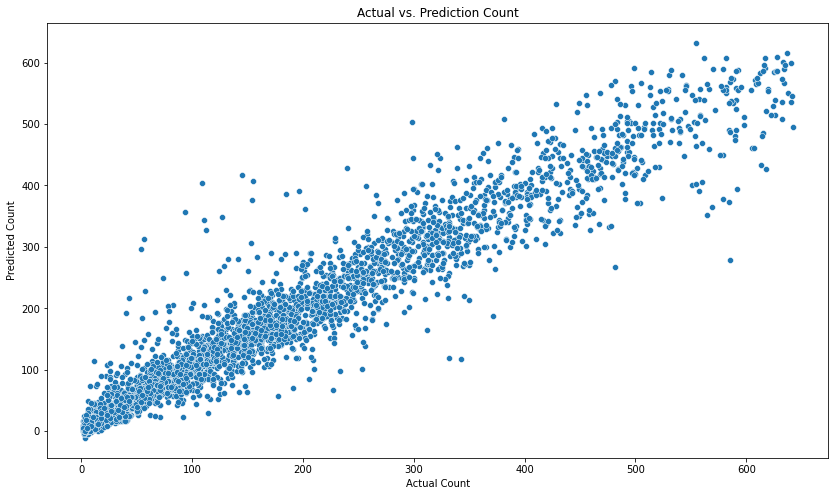

In [ ]:
plt.figure(figsize=(14, 8))
plot = sns.scatterplot(x=y_test, y=y_pred_xgb_tuning).set(title='Actual vs. Prediction Count', 
                                               xlabel='Actual Count', 
                                               ylabel='Predicted Count');

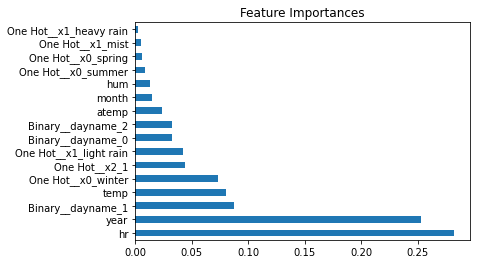

In [ ]:
# Plot feature importances
feature_imp = pd.Series(xgb_tuning['model'].feature_importances_, transformer.get_feature_names()).sort_values(ascending = False)
feature_imp.plot(kind='barh', title='Feature Importances');

In [ ]:
# Save model
import pickle

# final_model = Pipeline([('preprocess', transformer), ('model', XGBRegressor())])
# final_model.fit(X_train, y_train)
final_model = random_xgb.best_estimator_.fit(X_train, y_train)

pickle.dump(final_model, open('Model_XGB_BikeSharing.sav', 'wb'))

In [ ]:
# Load model
filename = 'Model_XGB_BikeSharing.sav'
loaded_model = pickle.load(open(filename, 'rb'))

In [ ]:
np.sqrt(mean_squared_error(y_test, loaded_model.predict(X_test)))

40.97284133508822